# Stress gradient calculation

This demo shows the stress gradient calculation module. A gradient is calculated by fitting a plane into a node and its neighbor nodes of an FEM mesh.

See [documentation](https://pylife.readthedocs.io/en/latest/mesh/gradient.html) for details on the module.

In [1]:
import numpy as np
import pandas as pd
import pylife.vmap
import pylife.stress.equistress
import pyvista as pv

Read in demo data and add the stress tensor dimensions for the third dimension.

In [2]:
vm_mesh = pylife.vmap.VMAP("plate_with_hole.vmap")

In [3]:
vm_mesh.mesh_coords("1")

x         y    z
element_id node_id                          
1          1734     14.897208  5.269875  0.0
           1582     14.555333  5.355806  0.0
           1596     14.630658  4.908741  0.0
           4923     14.726271  5.312840  0.0
           4924     14.592996  5.132274  0.0
...                       ...       ...  ...
4770       3812    -13.189782 -5.691876  0.0
           12418   -13.560289 -5.278386  0.0
           14446   -13.673285 -5.569107  0.0
           14614   -13.389065 -5.709927  0.0
           14534   -13.276068 -5.419206  0.0

[37884 rows x 3 columns]

In [4]:
pyLife_mesh = (vm_mesh.mesh_coords('1')
                    .join(vm_mesh.variable('1', 'STATE-2', 'STRESS_CAUCHY'))
                    .join(vm_mesh.variable('1', 'STATE-2', 'DISPLACEMENT')))
pyLife_mesh.sample(10)

,,x,y,z,S11,S22,S33,S12,S13,S23,dx,dy,dz
element_id,node_id,,,,,,,,,,,,
4713,4667,-12.290524,-5.582485,0.0,35.561584,1.621323,0.0,-15.232392,0.0,0.0,-0.005175,0.000063,0.0
3659,4174,-13.612119,-8.600292,0.0,53.012203,0.048595,0.0,-3.005789,0.0,0.0,-0.004919,0.000183,0.0
3102,11594,18.030689,-7.039535,0.0,32.276665,2.461891,0.0,4.239051,0.0,0.0,0.005602,-0.000042,0.0
3103,11597,10.181469,-1.998228,0.0,3.110107,-10.845884,0.0,7.932069,0.0,0.0,0.005582,0.000116,0.0
4383,14073,-18.135668,-4.415386,0.0,29.872982,8.512387,0.0,-6.046775,0.0,0.0,-0.006201,-0.000085,0.0
1707,8914,-13.263470,6.189435,0.0,39.608391,1.664300,0.0,13.795775,0.0,0.0,-0.005157,-0.000059,0.0
865,1181,18.610849,3.500688,0.0,29.455849,12.302162,0.0,-4.817523,0.0,0.0,0.006084,0.000116,0.0
610,812,5.199049,6.111510,0.0,67.544090,-2.337296,0.0,-1.545738,0.0,0.0,0.003013,-0.002720,0.0
466,704,7.291068,2.912279,0.0,-12.341468,-18.240107,0.0,14.554960,0.0,0.0,0.005290,-0.001148,0.0


In [5]:
pyLife_mesh['mises'] = pyLife_mesh.equistress.mises()

## We will use Pyvista for plotting FEM in the future

still work in progress, sorry dudes

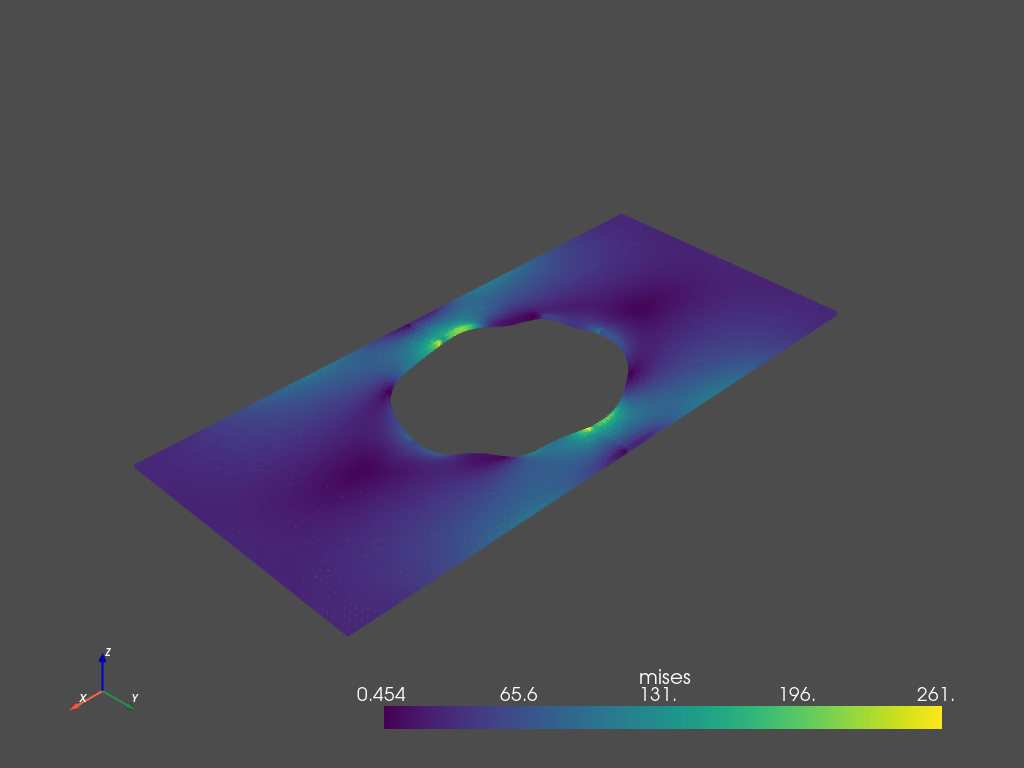

[(48.92329286329271, 48.92329286329271, 48.92329286329271),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [13]:
from pyvista import examples
pyLife_nodes = pyLife_mesh.groupby('node_id').mean()
mesh = pv.PolyData(pyLife_nodes[['x', 'y', 'z']].values)
mesh.point_arrays["mises"] = pyLife_nodes["mises"].values
mesh.plot(scalars="mises")

### if you are using jupyter-lab you can use some lines, too:
for more information see here: https://pyvista-doc.readthedocs.io/en/latest/plotting/itk_plotting.html

In [8]:
pl = pv.PlotterITK()
pl.add_mesh(mesh, scalars="mises", smooth_shading=True)
pl.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [9]:
pv.plot_itk(mesh, scalars="mises")

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…